# 1.Understand the Problem Statement & Import Packages and Datasets.

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the train dataset
train=pd.read_csv('train_LZdllcl.csv')
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
# Loading the test dataset
test=pd.read_csv('test_2umaH9m.csv')
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


# 2.Perform EDA (Exploratory Data Analysis) - Understanding the Datasets :

In [4]:
train.shape

(54808, 14)

In [5]:
test.shape

(23490, 13)

In [6]:
# Copying the employee id of test data to emp
emp=[]
emp=test['employee_id']

## Handling missing values

In [7]:
# Checking for null values of train data
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
# Treating the null values of train dataset
train['education'].fillna(train['education'].mode()[0],inplace=True)
train['previous_year_rating'].fillna(train['previous_year_rating'].mean(),inplace=True)

In [9]:
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

Now all the null vallues from train data are removed

In [10]:
# Checking for null values of test data
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [11]:
# Treating the null values of test dataset
test['education'].fillna(test['education'].mode()[0],inplace=True)
test['previous_year_rating'].fillna(test['previous_year_rating'].mean(),inplace=True)

In [12]:
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

Now all the null values are removed

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             23490 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [15]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [16]:
train.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        6
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

## Univariate Analysis

Text(0.5, 1.0, 'Count plot of departments')

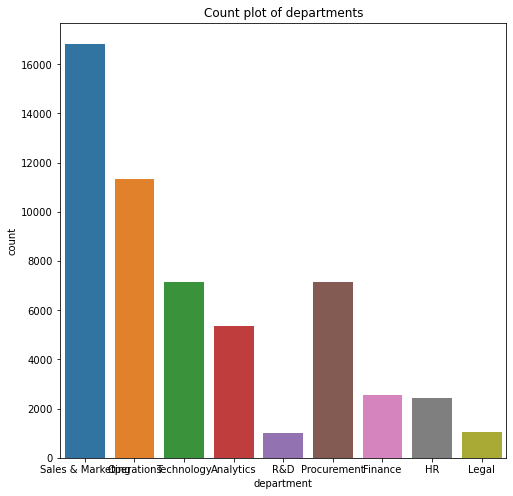

In [17]:
# Count plot of different departments
plt.figure(figsize=(8,8))
sns.countplot(x='department',data=train)
plt.title('Count plot of departments')

Text(0.5, 1.0, 'Count of 3 levels of education')

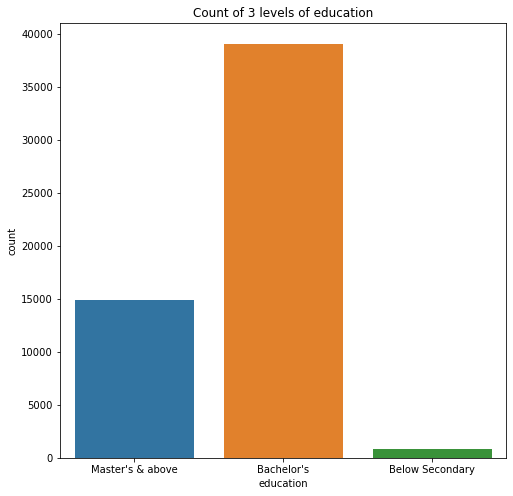

In [18]:
# Count plot of levels of education
plt.figure(figsize=(8,8))
sns.countplot(x='education',data=train)
plt.title('Count of 3 levels of education')

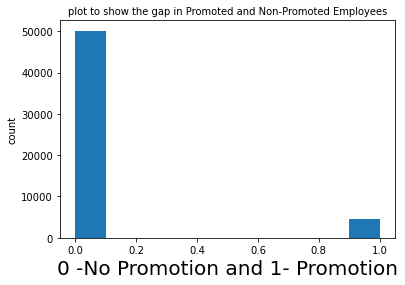

In [19]:
# Histogram of promoted and non promoted employeess
plt.hist(train['is_promoted'])
plt.title('plot to show the gap in Promoted and Non-Promoted Employees', fontsize = 10)
plt.xlabel('0 -No Promotion and 1- Promotion', fontsize = 20)
plt.ylabel('count')
plt.show()

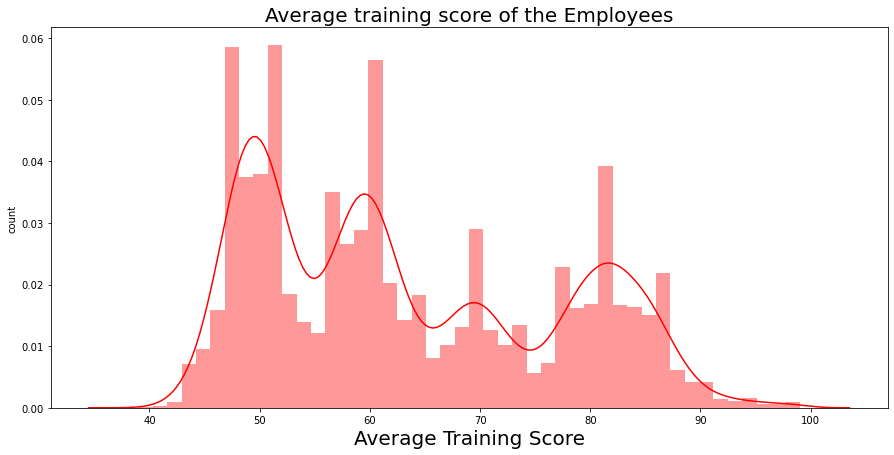

In [20]:
# Distplot representation of the avg_training score of the Employees

plt.figure(figsize=(15,7))
sns.distplot(train['avg_training_score'], color = 'Red')
plt.title('Average training score of the Employees', fontsize = 20)
plt.xlabel('Average Training Score', fontsize = 20)
plt.ylabel('count')
plt.show()

In [21]:
train['KPIs_met >80%'].value_counts()

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

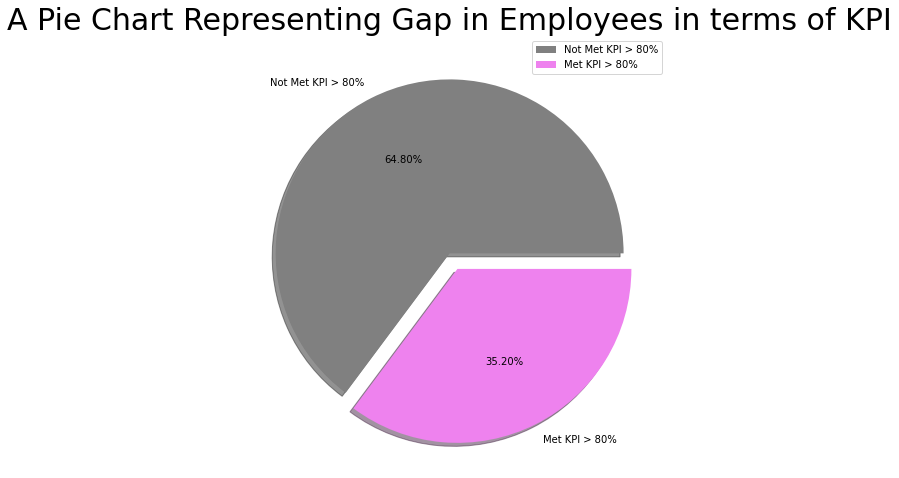

In [22]:
# plotting a pie chart

size = [35517, 19291]
labels = "Not Met KPI > 80%", "Met KPI > 80%"
colors = ['grey', 'violet']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Gap in Employees in terms of KPI', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()


## Bivariate Analysis

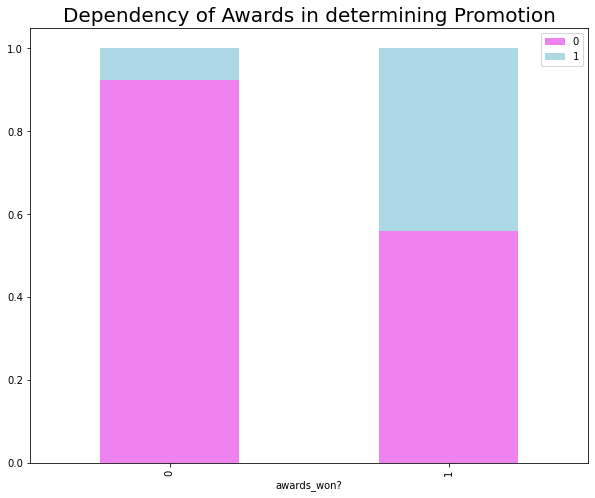

In [23]:
# dependency of awards in determining the promotion of employees

data = pd.crosstab(train['awards_won?'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar',stacked = True,figsize = (10, 8),color=['violet','lightblue'])

plt.title('Dependency of Awards in determining Promotion', fontsize = 20)
#plt.xlabel('Awards Won or Not', fontsize = 20)
plt.legend()
plt.show()

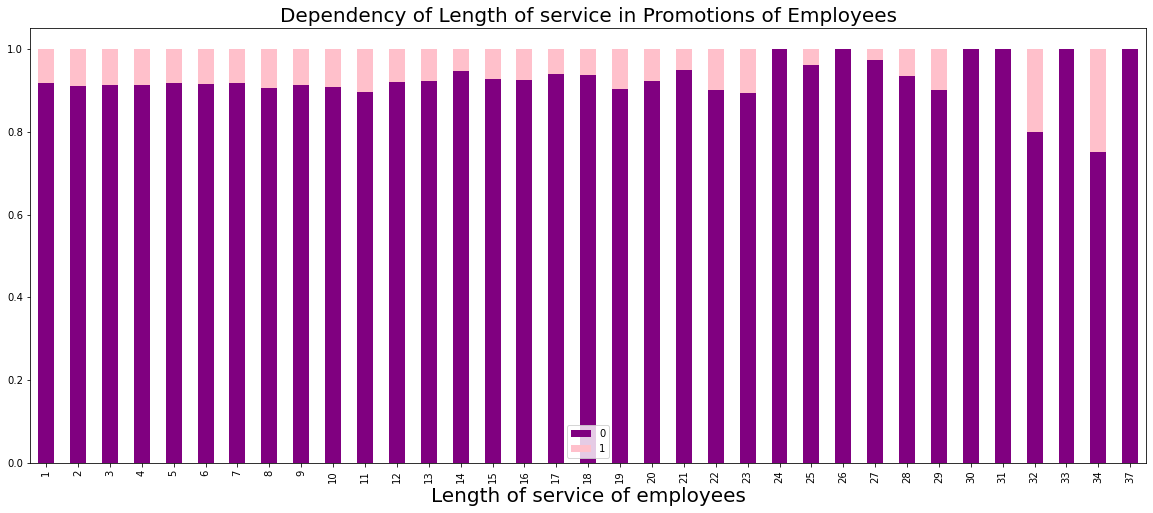

In [24]:
# checking how length of service determines the promotion of employees

data = pd.crosstab(train['length_of_service'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar',stacked =True,figsize =(20, 8),color = ['purple','pink'])

plt.title('Dependency of Length of service in Promotions of Employees', fontsize = 20)
plt.xlabel('Length of service of employees', fontsize = 20)
plt.legend()
plt.show()

<AxesSubplot:>

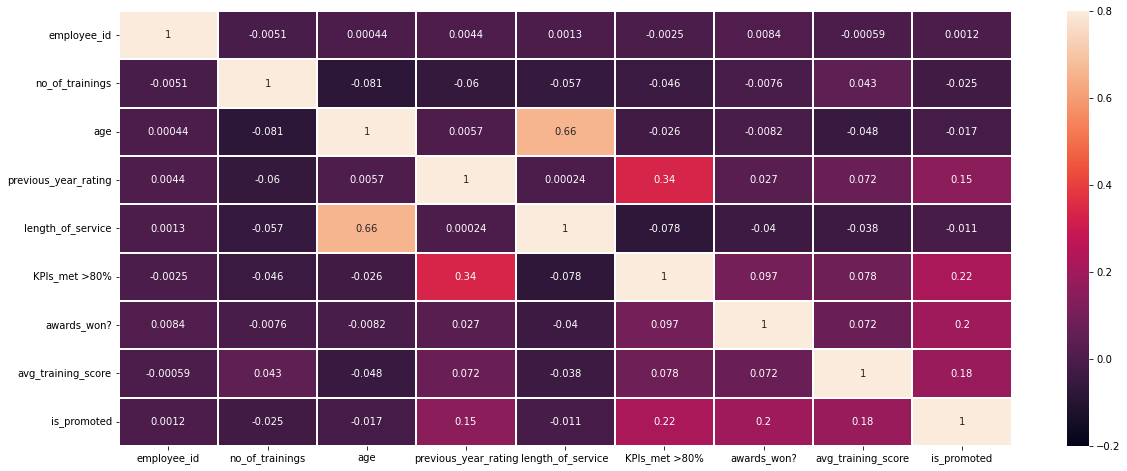

In [25]:
# Correlation Analysis of train data set
corrmatrix=train.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-.2,vmax=.8,annot=True,linewidth=0.2)

# 3.Feature Engineering

##  Label encoding

In [26]:
# Label Encoding of categorical features of train data

from sklearn.preprocessing import LabelEncoder
labelenc=LabelEncoder()
for col in train.select_dtypes(include='O').columns:
    train[col] = labelenc.fit_transform(train[col])
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,5,0,1,2,1,48,3.0,17,0,0,78,0
54804,74592,4,19,2,0,0,1,37,2.0,6,0,0,56,0
54805,13918,0,0,0,1,0,1,27,5.0,3,1,0,79,0
54806,13614,7,33,0,1,2,1,29,1.0,2,0,0,45,0


In [27]:
train_df=train.copy()

In [28]:
# Droping the feature 'employee_id' from train data
train.drop('employee_id',inplace=True,axis=1)
train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,8,18,0,1,0,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,8,5,0,1,2,1,48,3.0,17,0,0,78,0
54804,4,19,2,0,0,1,37,2.0,6,0,0,56,0
54805,0,0,0,1,0,1,27,5.0,3,1,0,79,0
54806,7,33,0,1,2,1,29,1.0,2,0,0,45,0


In [29]:
test.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [30]:
test.nunique()

employee_id             23490
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings             9
age                        41
previous_year_rating        6
length_of_service          34
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
dtype: int64

In [31]:
# Label Encoding of categorical features of test data

from sklearn.preprocessing import LabelEncoder
labelenc=LabelEncoder()
for col in test.select_dtypes(include='O').columns:
    test[col] = labelenc.fit_transform(test[col])
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,0,1,2,1,24,3.339146,1,1,0,77
1,74430,2,28,0,0,0,1,31,3.000000,5,0,0,51
2,72255,7,4,0,1,0,1,31,1.000000,4,0,0,47
3,38562,5,11,0,0,0,3,31,2.000000,9,0,0,65
4,64486,1,21,0,1,2,1,30,4.000000,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,3,11,1,1,2,1,24,3.000000,1,0,0,61
23486,25600,8,17,0,1,2,1,31,3.000000,7,0,0,74
23487,45409,2,7,0,0,2,1,26,4.000000,4,0,0,50
23488,1186,5,24,0,1,2,3,27,3.339146,1,0,0,70


In [32]:
# Droping the feature 'employee_id' from test data
test.drop('employee_id',inplace=True,axis=1)
test

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8,18,0,1,2,1,24,3.339146,1,1,0,77
1,2,28,0,0,0,1,31,3.000000,5,0,0,51
2,7,4,0,1,0,1,31,1.000000,4,0,0,47
3,5,11,0,0,0,3,31,2.000000,9,0,0,65
4,1,21,0,1,2,1,30,4.000000,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,3,11,1,1,2,1,24,3.000000,1,0,0,61
23486,8,17,0,1,2,1,31,3.000000,7,0,0,74
23487,2,7,0,0,2,1,26,4.000000,4,0,0,50
23488,5,24,0,1,2,3,27,3.339146,1,0,0,70


## Handling outliers

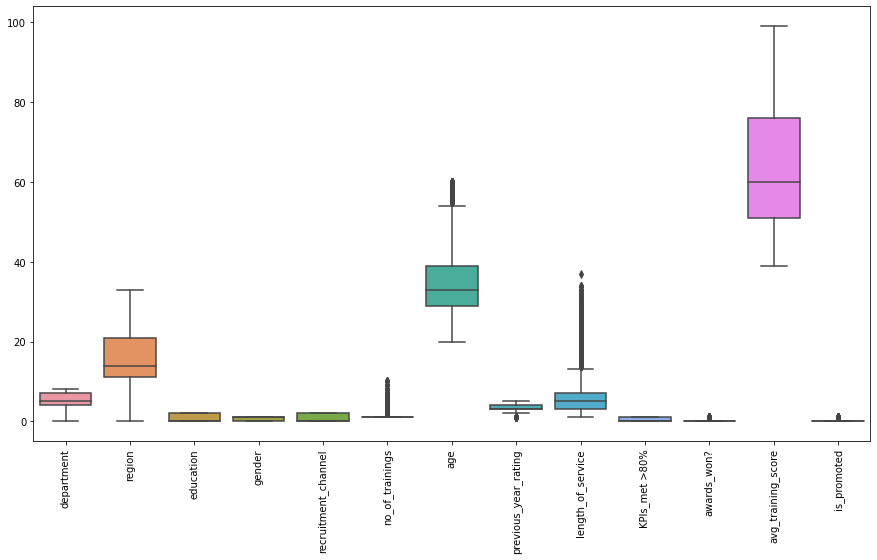

In [35]:
# Outliers
# Boxplot of the entire dataset
plt.figure(figsize=(15,8))
sns.boxplot(data= train)
plt.xticks(rotation = 90);

In [36]:
#Finding the outliers of Age

Q1=np.percentile(train['age'],25,interpolation='midpoint')
Q2=np.percentile(train['age'],50,interpolation='midpoint')
Q3=np.percentile(train['age'],75,interpolation='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("\nLower limit = ",low_limit)
print("Upper limit = ",up_limit)
outlier=[]
for x in train['age']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)

Q1 =  29.0
Q2 =  33.0
Q3 =  39.0

Lower limit =  14.0
Upper limit =  54.0


In [37]:
ind1 = train[(train["age"] < low_limit) | (train['age'] > up_limit)].index
train.loc[ind1].index

Int64Index([   33,    42,    49,    99,   307,   329,   352,   382,   407,
              435,
            ...
            54265, 54322, 54345, 54395, 54414, 54580, 54617, 54628, 54749,
            54792],
           dtype='int64', length=1435)

In [38]:
train.drop(ind1,inplace=True)
train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,8,18,0,1,0,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,8,5,0,1,2,1,48,3.0,17,0,0,78,0
54804,4,19,2,0,0,1,37,2.0,6,0,0,56,0
54805,0,0,0,1,0,1,27,5.0,3,1,0,79,0
54806,7,33,0,1,2,1,29,1.0,2,0,0,45,0


In [39]:
#Finding the outliers of Age

Q1=np.percentile(train['length_of_service'],25,interpolation='midpoint')
Q2=np.percentile(train['length_of_service'],50,interpolation='midpoint')
Q3=np.percentile(train['length_of_service'],75,interpolation='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("\nLower limit = ",low_limit)
print("Upper limit = ",up_limit)
outlier=[]
for x in train['length_of_service']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)

Q1 =  3.0
Q2 =  5.0
Q3 =  7.0

Lower limit =  -3.0
Upper limit =  13.0


In [41]:
ind2 = train[(train['length_of_service'] < low_limit) | (train['length_of_service'] > up_limit)].index
train.loc[ind2].index

Int64Index([   13,    60,    74,   109,   180,   259,   268,   274,   290,
              292,
            ...
            54585, 54589, 54592, 54619, 54689, 54691, 54695, 54697, 54754,
            54803],
           dtype='int64', length=2783)

In [42]:
train.drop(ind2,inplace=True)
train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,8,18,0,1,0,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,7,5,0,1,0,2,31,1.0,2,0,0,49,0
54804,4,19,2,0,0,1,37,2.0,6,0,0,56,0
54805,0,0,0,1,0,1,27,5.0,3,1,0,79,0
54806,7,33,0,1,2,1,29,1.0,2,0,0,45,0


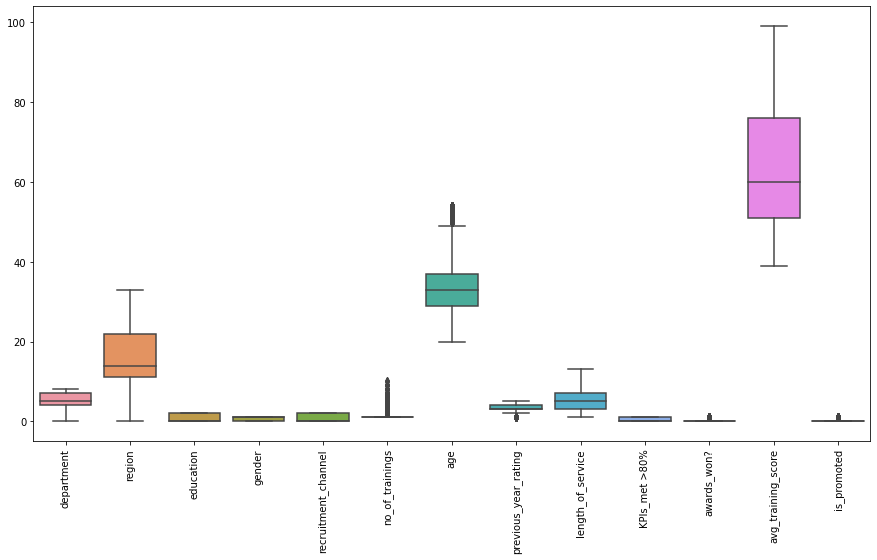

In [43]:
# Boxplot of the train dataset after removing outliers
plt.figure(figsize=(15,8))
sns.boxplot(data= train)
plt.xticks(rotation = 90);

# 4.Split Train Data into Predictors(Independent) & Target(Dependent).

In [44]:
# Splitting train into x and y
# x denotes feature columns and y denotes target column
x=train.drop(['is_promoted'],axis=1)
y=pd.DataFrame(train['is_promoted'])

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)


# 5.Data Scaling

In [46]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
test=sc.fit_transform(test)

# 6.Create  ML Model for Binary Classification Problem.

In [47]:
# Model  : Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [48]:
from sklearn.metrics import f1_score

print('F1_score :',round(f1_score(y_test,y_pred),3))


F1_score : 0.43


In [49]:
preds =  rf.predict(test)
print("predicted value usingrf : ",preds)
print("actual values  : ",y_test)

predicted value usingrf :  [0 0 0 ... 0 0 1]
actual values  :         is_promoted
14705            0
29000            0
8730             0
44176            1
3918             0
...            ...
5618             0
17700            0
21243            0
49098            0
46935            0

[12648 rows x 1 columns]


# 7.Result Submission

In [50]:
# Submission
# creating a dataframe with the employee id and their predicted promoted values{0, 1}

submission = pd.DataFrame()
submission['employee_id']=emp
submission['is_promoted']=preds
submission

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [52]:
submission.to_csv('C:\\Users\\noora\\hranalyticsoutput.csv',index=False)